In [ ]:
PART 1.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [14]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [16]:
df.shape

(2443651, 9)

In [19]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [20]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [ ]:
Part 1: Understanding Product Categories
1. Frequency Tables:
1.1. Generate a frequency table for the product category.

In [22]:
df['category'].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [ ]:
1.2. Which are the top 5 most listed product categories?

In [23]:
top_categories = df['category'].value_counts().head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [ ]:
2.Visualizations:
2.1.
Display the distribution of products across different categories using a bar chart. 
If you face problems understanding the chart, do it for a subset of top categories.

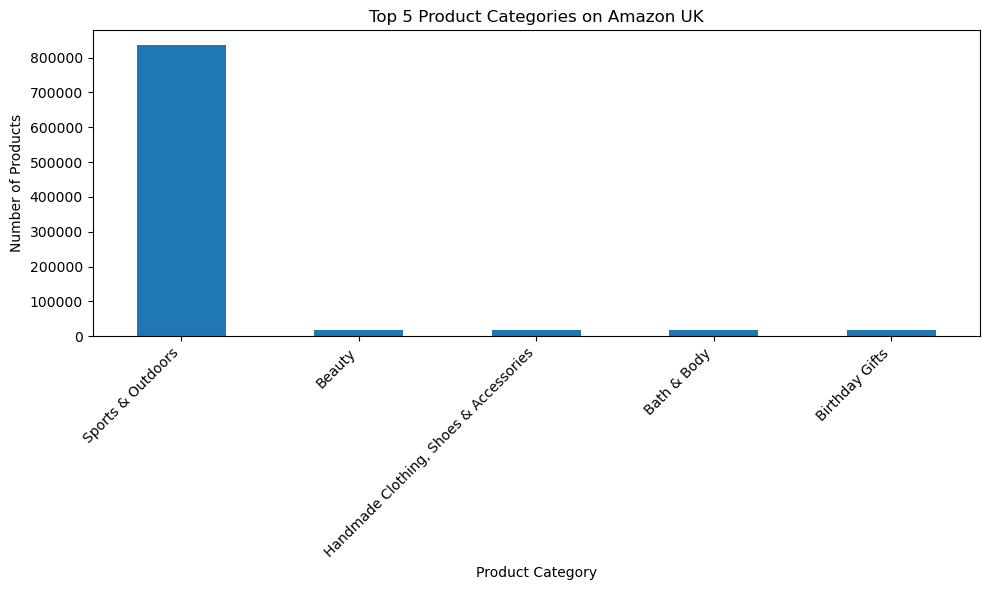

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')

plt.title("Top 5 Product Categories on Amazon UK")
plt.xlabel("Product Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
2.2. For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

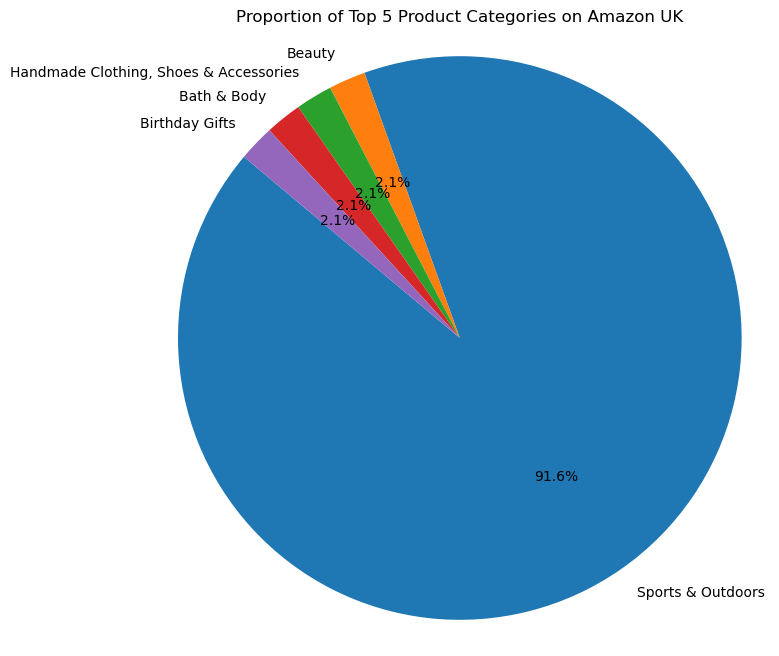

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    top_categories.values,
    labels=top_categories.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Proportion of Top 5 Product Categories on Amazon UK")
plt.axis('equal')
plt.show()

In [ ]:
Yes. Sports & Outdoors clearly dominates the listings, indicating a strong concentration of products in that category.

In [ ]:
PART 2

In [ ]:
1. Measures of Centrality:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [27]:

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(np.float64(89.24380943923661), 19.09, np.float64(9.99))

In [ ]:
The average price on Amazon UK is higher than the most common price. 
This means there are a few expensive products that make the average go up.”

In [ ]:
2. Measures of Dispersion:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [28]:
variance_price = df['price'].var()
std_price = df['price'].std()

variance_price, std_price

(119445.4853225653, 345.6088617535223)

In [31]:
range_price = df['price'].max() - df['price'].min()
range_price

100000.0

In [33]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
iqr_price = Q3 - Q1

Q1, Q3, iqr_price

(np.float64(9.99), np.float64(45.99), np.float64(36.0))

In [34]:
dispersion_summary = {
    'Variance': variance_price,
    'Standard Deviation': std_price,
    'Range': range_price,
    'IQR': iqr_price
}

dispersion_summary

{'Variance': 119445.4853225653,
 'Standard Deviation': 345.6088617535223,
 'Range': 100000.0,
 'IQR': np.float64(36.0)}

In [ ]:
Product prices are very different. 
There is a big difference between the cheapest and the most expensive products. 
The high standard deviation means prices are spread out and not close to the average.

In [ ]:
Yes. The large price range and IQR show that product prices are very different.
This means Amazon UK has both cheap products and expensive products.

In [ ]:
3.3. Visualizations:
    - Is there a specific price range where most products fall? 
    Plot a histogram to visualize the distribution of product prices.
    *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? 
    Use a box plot to showcase the spread and potential outliers in product pricing. 

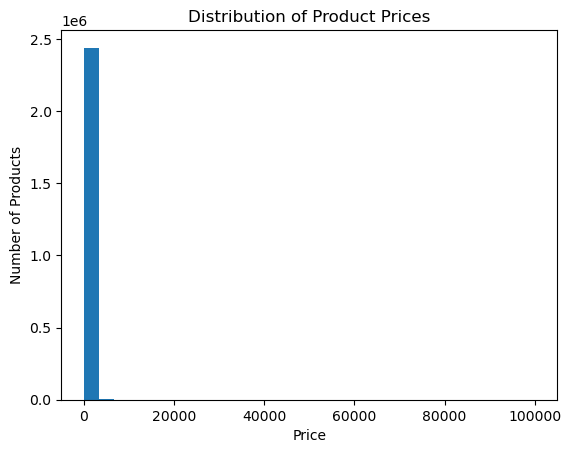

In [37]:
import matplotlib.pyplot as plt
prices = df['price']
plt.figure()
plt.hist(prices, bins=30)
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices")
plt.show()

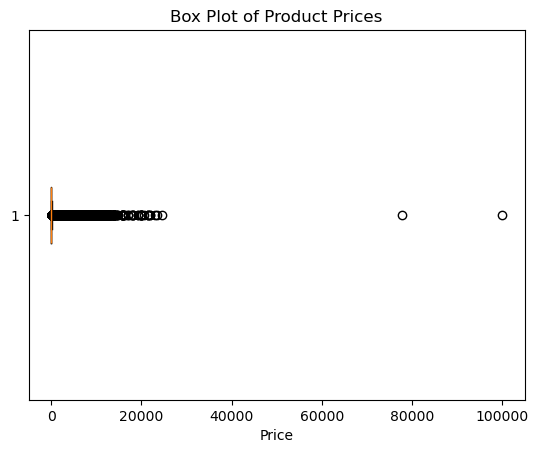

In [38]:
plt.figure()
plt.boxplot(prices, vert=False)
plt.xlabel("Price")
plt.title("Box Plot of Product Prices")
plt.show()

In [ ]:
Most products on Amazon UK are low to medium priced.
A small number of expensive products increase the average price.
Prices are widely spread and not evenly distributed.
The histogram shows common price ranges.
The box plot confirms the presence of high-priced outliers.

In [ ]:
PART 3

In [ ]:
1. Measures of Centrality:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [44]:
df['stars'].unique()

array([4.7, 4.6, 4.5, 4.8, 0. , 4.4, 4.3, 4.1, 4.9, 5. , 3.8, 3.6, 4. ,
       4.2, 3. , 3.9, 2.5, 3.4, 3.7, 3.2, 3.3, 3.5, 2.7, 2.1, 1. , 3.1,
       2. , 2.9, 2.8, 1.5, 2.2, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [40]:
import pandas as pd

ratings = df['stars']

mean_rating = ratings.mean()
median_rating = ratings.median()
mode_rating = ratings.mode()[0]

mean_rating, median_rating, mode_rating

(np.float64(2.152836472966066), 0.0, np.float64(0.0))

In [ ]:
Most products are rated high, the average is around 4-5 stars, and the most common rating is 5 stars.

In [ ]:
2. Measures of Dispersion:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [41]:
variance = ratings.var()
std_dev = ratings.std()
iqr = ratings.quantile(0.75) - ratings.quantile(0.25)

variance, std_dev, iqr

(4.81743402976196, 2.1948653785054697, np.float64(4.4))

In [ ]:
Ratings are quite consistent; most are around 4-5 stars.

In [ ]:
3. Shape of the Distribution:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [42]:
from scipy.stats import skew, kurtosis

skewness = skew(ratings)
kurt = kurtosis(ratings)

skewness, kurt

(np.float64(0.08120730776283251), np.float64(-1.9260046425498398))

In [ ]:
The distribution is right-skewed; most ratings are high (4-5 stars).

In [ ]:
4. Visualizations:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

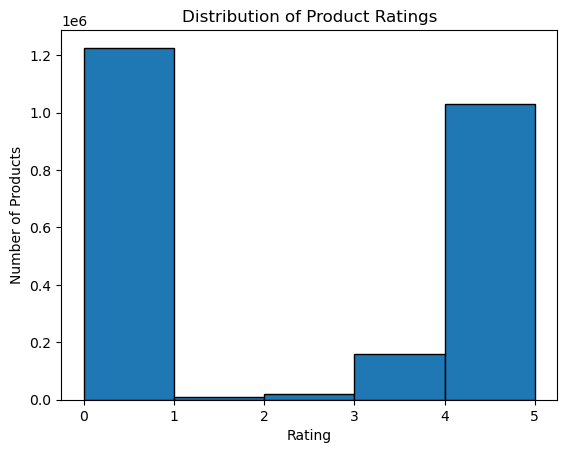

In [43]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(ratings, bins=5, edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Ratings")
plt.show()

In [ ]:
Most products on Amazon UK are rated high (4-5 stars).
Ratings are right-skewed, with many high scores.
Low standard deviation and IQR indicate ratings are quite consistent.